<a href="https://colab.research.google.com/github/soadD/netflix_data/blob/main/C%C3%B3pia_de_Projeto_ETL_e_EDA_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJETO FINAL - STREAMING**

Escola: SoulCode Academy

Curso: Analista de Dados e Dashboard

Assunto: ETL e EDA

Professora: Franciane Rodrigues

Alunos (as):
* Arthur Vale
* Crislane Silva
* Ewerton Lima
* Lucas Berenger
* Lidiane Dias Vicente
* Rafael Freitas

Data: 05/06/2024

# Preparando ambiente

Importando as bibliotecas necessárias para manipulação e análise dos dados.

In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Para ignorar os avisos que aparecem
warnings.filterwarnings('ignore')

# EXTRAÇÃO

Importando os dados do Google Drive.

In [ ]:
# Importa a biblioteca para conectar o Google Drive ao ambiente Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extrai os dados do arquivo CSV
df_users = pd.read_csv('/content/drive/MyDrive/Datasets/Netflix/netflix_userbase.csv')

In [ ]:
# Extrai os dados do arquivo Excel
df_global = pd.read_excel('/content/drive/MyDrive/Datasets/Netflix/all-weeks-global.xlsx', sheet_name='Top 10')
df_countries = pd.read_excel('/content/drive/MyDrive/Datasets/Netflix/all-weeks-countries.xlsx', sheet_name='Top 10')

# TRANSFORMAÇÃO

Verificando e tratando a base de dados:

* Verificação e tratamento de valores (ou observações) únicos
* Verificação e tratamento de duplicadas
* Verificação e tratamento de valores nulos
* Verificação e tratamento de inconsistência
* Verificação de colunas iguais
* Transformação de tipos adequados dos dados
* Tradução/Renomeação
* Seleção das possíveis colunas importantes para a análise
* Garantia de qualidade e integridade dos dados (obrigatória)

# Dataset de usuários

## Visão geral dos dados

Verificando nomes e números de colunas e linhas do dataframe.

**Dicionário de dados**

- **User ID:** Identificação única do usuário
- **Subscription Type:** Tipo de assinatura do usuário (ex: básica, premium, etc.)
- **Monthly Revenue:** Receita mensal gerada pelo usuário
- **Join Date:** Data de afiliação do usuário
- **Last Payment Date:** Data do último pagamento realizado pelo usuário
- **Country:** País de origem do usuário
- **Age:** Idade do usuário
- **Gender:** Gênero do usuário
- **Device:** Dispositivo utilizado pelo usuário (ex: desktop, mobile, etc.)
- **Plan Duration:** Duração do plano em meses


In [ ]:
# Mostra todas as colunas do dataframe
df_users.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [ ]:
# Mostra um resumo conciso do dataframe
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas
df_users

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


## Valores únicos

Verificando as informações e valores registrados nos campos do dataframe.

In [ ]:
# Verificando se os dados são únicos na coluna selecionada
df_users['User ID'].is_unique

True

In [ ]:
# Mostra os valores únicos das colunas categricas selecionadas
print(df_users['Subscription Type'].unique())
print(df_users['Country'].unique())
print(df_users['Gender'].unique())
print(df_users['Device'].unique())
print(df_users['Plan Duration'].unique())

['Basic' 'Premium' 'Standard']
['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']
['Male' 'Female']
['Smartphone' 'Tablet' 'Smart TV' 'Laptop']
['1 Month']


In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_users['Age'].unique())

[28 35 42 51 33 29 46 39 37 44 31 45 48 27 38 36 30 43 32 41 26 34 49 40
 47 50]


In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_users['Monthly Revenue'].unique())

[10 15 12 13 11 14]


## Valores duplicados

Verificando a existência de registros duplicados.

In [ ]:
# Mostra o número de registros (linhas)
df_users.shape[0]

2500

In [ ]:
# Verifica se há linhas duplicadas
df_users.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

## Valores ausentes e nulos

Verificando a existência de registros ausentes e nulos.

In [ ]:
# Mostra a quantidade total de valores nulos em cada coluna do dataframe
df_users.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

## Tradução e padronização

Renomeando as colunas e campos de registros do datraframe.

In [ ]:
# Renomea as colunas para tradução, padronização e melhor entendimento
df_users.rename(columns={
    'User ID': 'id_usuario',
    'Subscription Type': 'tipo_assinatura',
    'Monthly Revenue':'receita_mensal',
    'Join Date': 'data_afiliacao',
    'Last Payment Date': 'data_ultimo_pg',
    'Country': 'pais',
    'Age': 'idade',
    'Gender': 'genero',
    'Device': 'dispositivo',
    'Plan Duration': 'plano'
}, inplace=True)

# Mostra as 5 primeiras linhas do dataframe ou a quantidade informada como parâmetro
df_users.head()

,id_usuario,tipo_assinatura,receita_mensal,data_afiliacao,data_ultimo_pg,pais,idade,genero,dispositivo,plano
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
# Cria o dicionário para fazer a correspondência de valores, conforme definido abaixo
traducao_plano = {'1 Month': 'Month'}

# Mapea todos campos da coluna, tendo como parâmetro a dicionário criado acima
df_users.plano = df_users.plano.map(traducao_plano)
df_users.plano

0       Month
1       Month
2       Month
3       Month
4       Month
        ...  
2495    Month
2496    Month
2497    Month
2498    Month
2499    Month
Name: plano, Length: 2500, dtype: object

## Tipagem

Verificando os tipos dos dados e fazendo a conversão necessárias.

In [ ]:
# Converte o tipo de dados de int para str
df_users['id_usuario'] = df_users['id_usuario'].astype(str)

In [ ]:
# Converte o tipo de dado para datetime aaaa-mm-dd hh:mm:ss
df_users['data_afiliacao'] = pd.to_datetime(df_users['data_afiliacao'])
df_users['data_ultimo_pg'] = pd.to_datetime(df_users['data_ultimo_pg'])

# Mostra os tipos de variáveis de cada coluna
df_users.dtypes

<ipython-input-19-a226f800b8f0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_users['data_afiliacao'] = pd.to_datetime(df_users['data_afiliacao'])
<ipython-input-19-a226f800b8f0>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_users['data_ultimo_pg'] = pd.to_datetime(df_users['data_ultimo_pg'])


id_usuario                 object
tipo_assinatura            object
receita_mensal              int64
data_afiliacao     datetime64[ns]
data_ultimo_pg     datetime64[ns]
pais                       object
idade                       int64
genero                     object
dispositivo                object
plano                      object
dtype: object

## Novas variáveis

Criando novas variáveis para ajudar na análise.

In [ ]:
# Módulo para manipulação de datas e horas
from dateutil.relativedelta import relativedelta

# Cria uma função para calcular o tempo como cliente
def diferenca(row):
    delta = relativedelta(row['data_ultimo_pg'], row['data_afiliacao'])
    return delta.years * 12 + delta.months

# Aplica a função criada acima ao dataframe
df_users['meses_cliente'] = df_users.apply(diferenca, axis=1)

df_users.head()

,id_usuario,tipo_assinatura,receita_mensal,data_afiliacao,data_ultimo_pg,pais,idade,genero,dispositivo,plano,meses_cliente
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,Month,20
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,Month,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,Month,3
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,Month,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,Month,5


In [ ]:
# Conta a frequência que cada valor aparece
df_users.value_counts('meses_cliente')

meses_cliente
 12    284
 11    270
 8     268
 10    243
 13    204
 7     199
 9     188
 14    143
 6     123
 15    108
 5      87
 16     87
 3      62
 4      56
 17     51
 2      34
 18     29
 19     13
 1      11
 20     10
 0       8
 21      8
-1       4
 25      3
-4       3
-2       1
-3       1
 22      1
-5       1
Name: count, dtype: int64

In [ ]:
# Seleciona apenas os valores menores que zero
negative_months = df_users[df_users['meses_cliente'] < 0]
negative_months

,id_usuario,tipo_assinatura,receita_mensal,data_afiliacao,data_ultimo_pg,pais,idade,genero,dispositivo,plano,meses_cliente
14,15,Standard,12,2023-09-05,2023-06-28,Germany,38,Female,Smart TV,Month,-2
20,21,Premium,15,2023-10-06,2023-06-22,United States,26,Female,Laptop,Month,-3
34,35,Basic,10,2023-11-04,2023-06-28,Germany,39,Female,Smart TV,Month,-4
60,61,Premium,15,2023-08-02,2023-06-22,United States,28,Female,Laptop,Month,-1
69,70,Basic,10,2023-08-05,2023-06-22,Italy,41,Male,Smartphone,Month,-1
80,81,Premium,10,2023-11-01,2023-06-24,United States,37,Male,Tablet,Month,-4
108,109,Standard,13,2023-08-02,2023-06-25,Spain,35,Female,Tablet,Month,-1
153,154,Standard,11,2023-11-03,2023-06-27,Australia,27,Male,Laptop,Month,-4
169,170,Basic,14,2023-12-01,2023-06-25,Italy,32,Male,Laptop,Month,-5
222,223,Standard,12,2023-08-01,2023-06-25,United Kingdom,34,Female,Smartphone,Month,-1


In [ ]:
# Mostra o número de registros desse novo dataframe
negative_months.shape[0]

10

In [ ]:
# Seleciona apenas os registros com valores maiores ou igual a zero na coluna
df_users = df_users[df_users['meses_cliente'] >= 0]

In [ ]:
# Seleciona o mês da variável data
df_users['mes_afiliacao'] = df_users.data_afiliacao.dt.month
df_users['mes_ultimo_pg'] = df_users.data_ultimo_pg.dt.month

# Cria o dicionário para fazer a correspondência de valores, conforme definido abaixo
meses = {
    1: 'janeiro',
    2: 'fevereiro',
    3: 'março',
    4: 'abril',
    5: 'maio',
    6: 'junho',
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}

<ipython-input-25-7c7908f5f84c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['mes_afiliacao'] = df_users.data_afiliacao.dt.month
<ipython-input-25-7c7908f5f84c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['mes_ultimo_pg'] = df_users.data_ultimo_pg.dt.month


In [ ]:
# Mapea todos campos da coluna, tendo como parâmetro a dicionário criado acima
df_users.mes_afiliacao = df_users.mes_afiliacao.map(meses)
df_users.mes_afiliacao

<ipython-input-26-21003057244d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users.mes_afiliacao = df_users.mes_afiliacao.map(meses)


0         janeiro
1            maio
2       fevereiro
3         outubro
4         janeiro
          ...    
2495        julho
2496        abril
2497     setembro
2498     dezembro
2499       agosto
Name: mes_afiliacao, Length: 2490, dtype: object

In [ ]:
# Mapea todos campos da coluna, tendo como parâmetro a dicionário criado acima
df_users.mes_ultimo_pg = df_users.mes_ultimo_pg.map(meses)
df_users.mes_ultimo_pg

<ipython-input-27-1a0e39390fe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users.mes_ultimo_pg = df_users.mes_ultimo_pg.map(meses)


0        outubro
1          junho
2          junho
3          junho
4          junho
          ...   
2495    dezembro
2496       julho
2497       julho
2498    dezembro
2499    dezembro
Name: mes_ultimo_pg, Length: 2490, dtype: object

In [ ]:
# Mostra os tipos de variáveis de cada coluna
df_users.dtypes

id_usuario                 object
tipo_assinatura            object
receita_mensal              int64
data_afiliacao     datetime64[ns]
data_ultimo_pg     datetime64[ns]
pais                       object
idade                       int64
genero                     object
dispositivo                object
plano                      object
meses_cliente               int64
mes_afiliacao              object
mes_ultimo_pg              object
dtype: object

## Integridade dos dados

Garantindo a qualidade e integridade dos dados.

In [ ]:
# Instala e importa a biblioteca para verifica da integridade dos dados
!pip install pandera
import pandera as pa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.9/251.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Define schema de validação
schema = pa.DataFrameSchema({
    'id_usuario': pa.Column(pa.String),
    'tipo_assinatura': pa.Column(pa.String),
    'receita_mensal': pa.Column(pa.Int),
    'data_afiliacao': pa.Column(pa.DateTime),
    'data_ultimo_pg': pa.Column(pa.DateTime),
    'pais': pa.Column(pa.String),
    'idade': pa.Column(pa.Int),
    'genero': pa.Column(pa.String),
    'dispositivo': pa.Column(pa.String),
    'plano': pa.Column(pa.String),
    'meses_cliente': pa.Column(pa.Int),
    'mes_afiliacao': pa.Column(pa.String),
    'mes_ultimo_pg': pa.Column(pa.String)
    })

In [ ]:
# Validar o dataframe
schema.validate(df_users)

,id_usuario,tipo_assinatura,receita_mensal,data_afiliacao,data_ultimo_pg,pais,idade,genero,dispositivo,plano,meses_cliente,mes_afiliacao,mes_ultimo_pg
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,Month,20,janeiro,outubro
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,Month,25,maio,junho
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,Month,3,fevereiro,junho
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,Month,8,outubro,junho
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,Month,5,janeiro,junho
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,Month,16,julho,dezembro
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,Month,15,abril,julho
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,Month,10,setembro,julho
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,Month,11,dezembro,dezembro


# Dataset 1 - títulos

## Visão geral dos dados

**Dicionário de dados**

- **country_name:** Nome do país
- **country_iso2:** Código ISO de 2 letras do país
- **week:** Semana do ano
- **category:** Categoria do conteúdo (ex: filme, série, etc.)
- **weekly_rank:** Posição no ranking semanal
- **show_title:** Título do programa
- **season_title:** Título da temporada
- **cumulative_weeks_in_top_10:** Número cumulativo de semanas no top 10


In [ ]:
# Mostra todas as colunas do dataframe
df_countries.columns

Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')

In [ ]:
# Mostra um resumo conciso do dataframe
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283420 entries, 0 to 283419
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                283420 non-null  object
 1   country_iso2                283420 non-null  object
 2   week                        283420 non-null  object
 3   category                    283420 non-null  object
 4   weekly_rank                 283420 non-null  int64 
 5   show_title                  283420 non-null  object
 6   season_title                138659 non-null  object
 7   cumulative_weeks_in_top_10  283420 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.3+ MB


In [ ]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas
df_countries

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-05-26,Films,1,Sing 2,NaN,1
1,Argentina,AR,2024-05-26,Films,2,Atlas,NaN,1
2,Argentina,AR,2024-05-26,Films,3,Ice Age: Dawn of the Dinosaurs,NaN,1
3,Argentina,AR,2024-05-26,Films,4,In Good Hands 2,NaN,1
4,Argentina,AR,2024-05-26,Films,5,Daddy Daughter Trip,NaN,2
...,...,...,...,...,...,...,...,...
283415,Vietnam,VN,2021-07-04,TV,6,Reply 1988,Reply 1988: Season 1,1
283416,Vietnam,VN,2021-07-04,TV,7,"Nevertheless,","Nevertheless,: Limited Series",1
283417,Vietnam,VN,2021-07-04,TV,8,Too Hot to Handle,Too Hot to Handle: Season 2,1
283418,Vietnam,VN,2021-07-04,TV,9,Record of Ragnarok,Record of Ragnarok: Season 1,1


## Valores únicos

In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_countries['country_name'].unique())

['Argentina' 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Belgium' 'Bolivia' 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Guadeloupe' 'Guatemala' 'Honduras'
 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kenya' 'Kuwait' 'Latvia' 'Lebanon'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Martinique'
 'Mauritius' 'Mexico' 'Morocco' 'Netherlands' 'New Caledonia'
 'New Zealand' 'Nicaragua' 'Nigeria' 'Norway' 'Oman' 'Pakistan' 'Panama'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Russia' 'Réunion' 'Saudi Arabia' 'Serbia' 'Singapore' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Taiwan' 'Thailand' 'Trinidad and Tobago' 'Turkey'
 'Ukraine' 'United Arab Emirates' 'United 

In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_countries['country_iso2'].unique())

['AR' 'AU' 'AT' 'BS' 'BH' 'BD' 'BE' 'BO' 'BR' 'BG' 'CA' 'CL' 'CO' 'CR'
 'HR' 'CY' 'CZ' 'DK' 'DO' 'EC' 'EG' 'SV' 'EE' 'FI' 'FR' 'DE' 'GR' 'GP'
 'GT' 'HN' 'HK' 'HU' 'IS' 'IN' 'ID' 'IE' 'IL' 'IT' 'JM' 'JP' 'JO' 'KE'
 'KW' 'LV' 'LB' 'LT' 'LU' 'MY' 'MV' 'MT' 'MQ' 'MU' 'MX' 'MA' 'NL' 'NC'
 'NZ' 'NI' 'NG' 'NO' 'OM' 'PK' 'PA' 'PY' 'PE' 'PH' 'PL' 'PT' 'QA' 'RO'
 'RU' 'RE' 'SA' 'RS' 'SG' 'SK' 'SI' 'ZA' 'KR' 'ES' 'LK' 'SE' 'CH' 'TW'
 'TH' 'TT' 'TR' 'UA' 'AE' 'GB' 'US' 'UY' 'VE' 'VN']


In [ ]:
# Calcula o número de títulos únicos na coluna
unique_country_name = df_countries['country_name'].nunique()
print(f"Número de títulos únicos é: {unique_country_name}")

Número de títulos únicos é: 94


In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_countries['category'].unique())

['Films' 'TV']


In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_countries['weekly_rank'].unique())

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_countries['cumulative_weeks_in_top_10'].unique())

[  1   2   3   5   6   7   4  10   8  82  21  20  81  19  80  18  79  17
  78   9  16  15  14  77  13  76  25  12  24  75  11  23  74  22  73  72
  71  70  69  68  67  66  65  31  64  63  62  61  60  59  58  57  56  55
  54  30  53  29  52  28  51  27  26  50  49  48  47  46  45  44  43  42
  41  40  39  38  37  36  35  34  33  32  83  93  92  91  90  89  88  87
  86  85  84 102 101 100  99  98  97  96  95  94 113 112 111 110 109 108
 107 106 105 104 103]


In [ ]:
# Verificando se os dados são unicos na coluna selecionada
df_countries['show_title'].is_unique

False

In [ ]:
# Calcula o númerod de títulos únicos na coluna
unique_countries_titles = df_countries['show_title'].nunique()
print(f"Número de títulos únicos é: {unique_countries_titles}")

Número de títulos únicos é: 7439


In [ ]:
# Verificando se os dados são unicos na coluna selecionada
df_countries['season_title'].is_unique

False

In [ ]:
# Calcula o númerod de títulos únicos na coluna
unique_countries_season = df_countries['season_title'].nunique()
print(f"Número de títulos de temporadas únicas é: {unique_countries_season}")

Número de títulos de temporadas únicas é: 2504


## Valores duplicados

In [ ]:
# Mostra o número de registros (linhas)
df_countries.shape[0]

283420

In [ ]:
# Verifica se há linhas duplicadas
df_countries.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
283415    False
283416    False
283417    False
283418    False
283419    False
Length: 283420, dtype: bool

## Valores ausentes e nulos

In [ ]:
# Mostra a quantidade total de valores nulos em cada coluna do dataframe
df_countries.isna().sum()

country_name                       0
country_iso2                       0
week                               0
category                           0
weekly_rank                        0
show_title                         0
season_title                  144761
cumulative_weeks_in_top_10         0
dtype: int64

In [ ]:
# Verifica o percentural de valores nulos
porcentagem_nulos = (df_countries.isna().sum() / len(df_countries)) * 100
print(round(porcentagem_nulos, 1))

country_name                   0.0
country_iso2                   0.0
week                           0.0
category                       0.0
weekly_rank                    0.0
show_title                     0.0
season_title                  51.1
cumulative_weeks_in_top_10     0.0
dtype: float64


In [ ]:
# Faz uma cópia do dataset completo para ficar de backup
df_countries_completo = df_countries.copy()

# Exclui a coluna selecionda
df_countries.drop(columns=['season_title'], inplace=True)
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283420 entries, 0 to 283419
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                283420 non-null  object
 1   country_iso2                283420 non-null  object
 2   week                        283420 non-null  object
 3   category                    283420 non-null  object
 4   weekly_rank                 283420 non-null  int64 
 5   show_title                  283420 non-null  object
 6   cumulative_weeks_in_top_10  283420 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 15.1+ MB


## Tradução e padronização

Renomeando as colunas do dataframe.

In [ ]:
# Renomea as colunas para tradução, padronização e melhor entendimento
df_countries.rename(columns={
    'country_name': 'nome_pais',
    'country_iso2':'iso_pais',
    'week': 'semana',
    'category': 'categoria',
    'weekly_rank': 'rank_semanal',
    'show_title': 'titulo',
    'cumulative_weeks_in_top_10' : 'semanas_acumuladas_top_10',
}, inplace=True)

df_countries.head()

,nome_pais,iso_pais,semana,categoria,rank_semanal,titulo,semanas_acumuladas_top_10
0,Argentina,AR,2024-05-26,Films,1,Sing 2,1
1,Argentina,AR,2024-05-26,Films,2,Atlas,1
2,Argentina,AR,2024-05-26,Films,3,Ice Age: Dawn of the Dinosaurs,1
3,Argentina,AR,2024-05-26,Films,4,In Good Hands 2,1
4,Argentina,AR,2024-05-26,Films,5,Daddy Daughter Trip,2


## Tipagem

In [ ]:
# Convertendo o tipo de dado para datetime
df_countries['semana'] = pd.to_datetime(df_countries.semana)

df_countries.dtypes

nome_pais                            object
iso_pais                             object
semana                       datetime64[ns]
categoria                            object
rank_semanal                          int64
titulo                               object
semanas_acumuladas_top_10             int64
dtype: object

## Novas variáveis

In [ ]:
# Seleciona o ano e mes da variável data
df_countries['ano'] = df_countries['semana'].dt.year
df_countries['mes'] = df_countries['semana'].dt.month

df_countries.head()

,nome_pais,iso_pais,semana,categoria,rank_semanal,titulo,semanas_acumuladas_top_10,ano,mes
0,Argentina,AR,2024-05-26,Films,1,Sing 2,1,2024,5
1,Argentina,AR,2024-05-26,Films,2,Atlas,1,2024,5
2,Argentina,AR,2024-05-26,Films,3,Ice Age: Dawn of the Dinosaurs,1,2024,5
3,Argentina,AR,2024-05-26,Films,4,In Good Hands 2,1,2024,5
4,Argentina,AR,2024-05-26,Films,5,Daddy Daughter Trip,2,2024,5


In [ ]:
# Cria o dicionário para fazer a correspondência de valores, conforme definido abaixo
meses = {
    1: 'janeiro',
    2: 'fevereiro',
    3: 'março',
    4: 'abril',
    5: 'maio',
    6: 'junho',
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}

# Mapea todos campos da coluna, tendo como parâmetro a dicionário criado acima
df_countries.mes = df_countries.mes.map(meses)
df_countries.mes

0          maio
1          maio
2          maio
3          maio
4          maio
          ...  
283415    julho
283416    julho
283417    julho
283418    julho
283419    julho
Name: mes, Length: 283420, dtype: object

## Integridade dos dados

In [ ]:
# Define schema de validação
schema = pa.DataFrameSchema({
    'nome_pais': pa.Column(pa.String),
    'iso_pais': pa.Column(pa.String),
    'semana': pa.Column(pa.DateTime),
    'categoria': pa.Column(pa.String),
    'rank_semanal': pa.Column(pa.Int),
    'titulo': pa.Column(pa.String),
    'semanas_acumuladas_top_10': pa.Column(pa.Int),
    'ano': pa.Column(pa.Int32),
    'mes': pa.Column(pa.String)
})

# Validar o dataframe
schema.validate(df_countries)

,nome_pais,iso_pais,semana,categoria,rank_semanal,titulo,semanas_acumuladas_top_10,ano,mes
0,Argentina,AR,2024-05-26,Films,1,Sing 2,1,2024,maio
1,Argentina,AR,2024-05-26,Films,2,Atlas,1,2024,maio
2,Argentina,AR,2024-05-26,Films,3,Ice Age: Dawn of the Dinosaurs,1,2024,maio
3,Argentina,AR,2024-05-26,Films,4,In Good Hands 2,1,2024,maio
4,Argentina,AR,2024-05-26,Films,5,Daddy Daughter Trip,2,2024,maio
...,...,...,...,...,...,...,...,...,...
283415,Vietnam,VN,2021-07-04,TV,6,Reply 1988,1,2021,julho
283416,Vietnam,VN,2021-07-04,TV,7,"Nevertheless,",1,2021,julho
283417,Vietnam,VN,2021-07-04,TV,8,Too Hot to Handle,1,2021,julho
283418,Vietnam,VN,2021-07-04,TV,9,Record of Ragnarok,1,2021,julho


# Dataset 2 - títulos

## Visão geral dos dados

**Dicionário de dados**

- **week:** Semana do ano
- **category:** Categoria do conteúdo (ex: filme, série, etc.)
- **weekly_rank:** Posição no ranking semanal
- **show_title:** Título do programa
- **season_title:** Título da temporada
- **weekly_hours_viewed:** Horas assistidas semanalmente
- **runtime:** Duração do conteúdo
- **weekly_views:** Visualizações semanais
- **cumulative_weeks_in_top_10:** Número cumulativo de semanas no top 10
- **is_staggered_launch:** Indica se o lançamento é escalonado
- **episode_launch_details:** Detalhes do lançamento dos episódios


In [ ]:
# Mostra todas as colunas do dataframe
df_global.columns

Index(['week', 'category', 'weekly_rank', 'show_title', 'season_title',
       'weekly_hours_viewed', 'runtime', 'weekly_views',
       'cumulative_weeks_in_top_10', 'is_staggered_launch',
       'episode_launch_details'],
      dtype='object')

In [ ]:
# Mostra um resumo conciso do dataframe
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        6080 non-null   object 
 1   category                    6080 non-null   object 
 2   weekly_rank                 6080 non-null   int64  
 3   show_title                  6080 non-null   object 
 4   season_title                2959 non-null   object 
 5   weekly_hours_viewed         6080 non-null   int64  
 6   runtime                     2000 non-null   float64
 7   weekly_views                2000 non-null   float64
 8   cumulative_weeks_in_top_10  6080 non-null   int64  
 9   is_staggered_launch         6080 non-null   bool   
 10  episode_launch_details      78 non-null     object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 481.1+ KB


In [ ]:
# Mostra um resumo do dataframe, com os 5 primeiros e últimos registros e total de linhas e colunas
df_global

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2021-07-04,Films (English),1,Fatherhood,NaN,25680000,NaN,NaN,1,False,NaN
1,2021-07-04,Films (English),2,Fear Street Part 1: 1994,NaN,16620000,NaN,NaN,1,False,NaN
2,2021-07-04,Films (English),3,Wish Dragon,NaN,15260000,NaN,NaN,1,False,NaN
3,2021-07-04,Films (English),4,The Ice Road,NaN,13690000,NaN,NaN,1,False,NaN
4,2021-07-04,Films (English),5,Good on Paper,NaN,10580000,NaN,NaN,1,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6075,2024-05-26,TV (Non-English),6,The Atypical Family,The Atypical Family: Limited Series,12200000,0.0000,1600000.0,3,True,"[{""episodesLaunched"":2,""countryList"":[""UY"",""BO..."
6076,2024-05-26,TV (Non-English),7,Heeramandi: The Diamond Bazaar,Heeramandi: The Diamond Bazaar: Season 1,11300000,7.3167,1500000.0,4,False,NaN
6077,2024-05-26,TV (Non-English),8,Queen of Tears,Queen of Tears: Limited Series,30700000,23.3667,1300000.0,12,False,NaN
6078,2024-05-26,TV (Non-English),9,Garouden: The Way of the Lone Wolf,Garouden: The Way of the Lone Wolf: Season 1,4000000,3.4500,1200000.0,1,False,NaN


## Valores únicos

In [ ]:
# Mostra os valores únicos da coluna selecionada
print(pd.unique(df_global['category']))

['Films (English)' 'Films (Non-English)' 'TV (English)' 'TV (Non-English)']


In [ ]:
# Verificando se os dados são unicos na coluna selecionada
df_global['show_title'].is_unique

False

In [ ]:
# Calcula o númerod de títulos únicos na coluna
unique_global_titles = df_global['show_title'].nunique()
print(f"Número de títulos únicos é: {unique_global_titles}")

Número de títulos únicos é: 1993


In [ ]:
# Verificando se os dados são unicos na coluna selecionada
df_global['season_title'].is_unique

False

In [ ]:
# Calcula o númerod de temporadas únicas na coluna
unique_global_season = df_global['season_title'].nunique()
print(f"Número de títulos únicos é: {unique_global_season}")

Número de títulos únicos é: 878


In [ ]:
# Mostra os valores únicos da coluna selecionada
print(pd.unique(df_global['weekly_rank']))

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# Mostra os valores únicos da coluna selecionadas
print(df_global['cumulative_weeks_in_top_10'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [ ]:
df_global['is_staggered_launch'].unique()

array([False,  True])

## Valores duplicados

In [ ]:
# Mostra o número de registros (linhas)
df_global.shape[0]

6080

In [ ]:
# Verifica se há linhas duplicadas
df_global.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6075    False
6076    False
6077    False
6078    False
6079    False
Length: 6080, dtype: bool

## Valores ausentes e nulos

In [ ]:
# Mostra a quantidade total de valores nulos em cada coluna do dataframe
df_global.isnull().sum()

week                             0
category                         0
weekly_rank                      0
show_title                       0
season_title                  3121
weekly_hours_viewed              0
runtime                       4080
weekly_views                  4080
cumulative_weeks_in_top_10       0
is_staggered_launch              0
episode_launch_details        6002
dtype: int64

In [ ]:
# Verifica o percentural de valores nulos
porcentagem_nulos = (df_global.isnull().sum() / len(df_global)) * 100

print(round(porcentagem_nulos, 1))

week                           0.0
category                       0.0
weekly_rank                    0.0
show_title                     0.0
season_title                  51.3
weekly_hours_viewed            0.0
runtime                       67.1
weekly_views                  67.1
cumulative_weeks_in_top_10     0.0
is_staggered_launch            0.0
episode_launch_details        98.7
dtype: float64


In [ ]:
# Faz uma cópia do dataset completo para ficar de backup
df_global_completo = df_global.copy()

# Exclui a coluna selecionda
df_global.drop(columns=['season_title', 'runtime', 'weekly_views', 'episode_launch_details'], inplace=True)
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   week                        6080 non-null   object
 1   category                    6080 non-null   object
 2   weekly_rank                 6080 non-null   int64 
 3   show_title                  6080 non-null   object
 4   weekly_hours_viewed         6080 non-null   int64 
 5   cumulative_weeks_in_top_10  6080 non-null   int64 
 6   is_staggered_launch         6080 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 291.1+ KB


## Tradução e padronização

In [ ]:
# Renomea as colunas para tradução e padronização
df_global.rename(columns={
    'week': 'semana',
    'category': 'categoria',
    'weekly_rank': 'rank_semanal',
    'show_title': 'titulo',
    'weekly_hours_viewed': 'horas_semanais_visualizadas',
    'cumulative_weeks_in_top_10': 'semanas_acumuladas_top_10',
    'is_staggered_launch': 'lançamento_escalonado',
}, inplace=True)

df_global.head()

,semana,categoria,rank_semanal,titulo,horas_semanais_visualizadas,semanas_acumuladas_top_10,lançamento_escalonado
0,2021-07-04,Films (English),1,Fatherhood,25680000,1,False
1,2021-07-04,Films (English),2,Fear Street Part 1: 1994,16620000,1,False
2,2021-07-04,Films (English),3,Wish Dragon,15260000,1,False
3,2021-07-04,Films (English),4,The Ice Road,13690000,1,False
4,2021-07-04,Films (English),5,Good on Paper,10580000,1,False


## Tipagem

In [ ]:
# Convertendo o tipo de dado para datetime
df_global['semana'] = pd.to_datetime(df_global.semana)

df_global.dtypes

semana                         datetime64[ns]
categoria                              object
rank_semanal                            int64
titulo                                 object
horas_semanais_visualizadas             int64
semanas_acumuladas_top_10               int64
lançamento_escalonado                    bool
dtype: object

## Novas variáveis

In [ ]:
# Seleciona o dia/mês/ano da variável data
df_global['ano'] = df_global['semana'].dt.year
df_global['mes'] = df_global['semana'].dt.month

df_global.head()

,semana,categoria,rank_semanal,titulo,horas_semanais_visualizadas,semanas_acumuladas_top_10,lançamento_escalonado,ano,mes
0,2021-07-04,Films (English),1,Fatherhood,25680000,1,False,2021,7
1,2021-07-04,Films (English),2,Fear Street Part 1: 1994,16620000,1,False,2021,7
2,2021-07-04,Films (English),3,Wish Dragon,15260000,1,False,2021,7
3,2021-07-04,Films (English),4,The Ice Road,13690000,1,False,2021,7
4,2021-07-04,Films (English),5,Good on Paper,10580000,1,False,2021,7


In [ ]:
# Cria o dicionário para fazer a correspondência de valores, conforme definido abaixo
meses = {
    1: 'janeiro',
    2: 'fevereiro',
    3: 'março',
    4: 'abril',
    5: 'maio',
    6: 'junho',
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}

# Mapea todos campos da coluna, tendo como parâmetro a dicionário criado acima
df_global.mes = df_global.mes.map(meses)
df_global.mes

0       julho
1       julho
2       julho
3       julho
4       julho
        ...  
6075     maio
6076     maio
6077     maio
6078     maio
6079     maio
Name: mes, Length: 6080, dtype: object

## Integridade dos dados

In [ ]:
# Define schema de validação
schema = pa.DataFrameSchema({
    'semana': pa.Column(pa.DateTime),
    'categoria': pa.Column(pa.String),
    'rank_semanal': pa.Column(pa.Int),
    'titulo': pa.Column(pa.String),
    'horas_semanais_visualizadas': pa.Column(pa.Int),
    'semanas_acumuladas_top_10': pa.Column(pa.Int),
    'lançamento_escalonado': pa.Column(pa.Bool),
    'ano': pa.Column(pa.Int32),
    'mes': pa.Column(pa.String)
})

# Validar o dataframe
schema.validate(df_global)

,semana,categoria,rank_semanal,titulo,horas_semanais_visualizadas,semanas_acumuladas_top_10,lançamento_escalonado,ano,mes
0,2021-07-04,Films (English),1,Fatherhood,25680000,1,False,2021,julho
1,2021-07-04,Films (English),2,Fear Street Part 1: 1994,16620000,1,False,2021,julho
2,2021-07-04,Films (English),3,Wish Dragon,15260000,1,False,2021,julho
3,2021-07-04,Films (English),4,The Ice Road,13690000,1,False,2021,julho
4,2021-07-04,Films (English),5,Good on Paper,10580000,1,False,2021,julho
...,...,...,...,...,...,...,...,...,...
6075,2024-05-26,TV (Non-English),6,The Atypical Family,12200000,3,True,2024,maio
6076,2024-05-26,TV (Non-English),7,Heeramandi: The Diamond Bazaar,11300000,4,False,2024,maio
6077,2024-05-26,TV (Non-English),8,Queen of Tears,30700000,12,False,2024,maio
6078,2024-05-26,TV (Non-English),9,Garouden: The Way of the Lone Wolf,4000000,1,False,2024,maio


# Junção dos datasets - títulos

In [ ]:
# Cria uma dataframe com a junção dos dois dataframe com dados de títulos
df_geral = pd.merge(df_countries, df_global, how='left', on=['semana', 'rank_semanal', 'titulo'])

In [ ]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283420 entries, 0 to 283419
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   nome_pais                    283420 non-null  object        
 1   iso_pais                     283420 non-null  object        
 2   semana                       283420 non-null  datetime64[ns]
 3   categoria_x                  283420 non-null  object        
 4   rank_semanal                 283420 non-null  int64         
 5   titulo                       283420 non-null  object        
 6   semanas_acumuladas_top_10_x  283420 non-null  int64         
 7   ano_x                        283420 non-null  int32         
 8   mes_x                        283420 non-null  object        
 9   categoria_y                  41839 non-null   object        
 10  horas_semanais_visualizadas  41839 non-null   float64       
 11  semanas_acumuladas_top_10_

In [ ]:
# Verifica o percentural de valores nulos
porcentagem_nulos = (df_geral.isna().sum() / len(df_geral)) * 100
print(round(porcentagem_nulos, 1))

nome_pais                       0.0
iso_pais                        0.0
semana                          0.0
categoria_x                     0.0
rank_semanal                    0.0
titulo                          0.0
semanas_acumuladas_top_10_x     0.0
ano_x                           0.0
mes_x                           0.0
categoria_y                    85.2
horas_semanais_visualizadas    85.2
semanas_acumuladas_top_10_y    85.2
lançamento_escalonado          85.2
ano_y                          85.2
mes_y                          85.2
dtype: float64


## Integridade dos dados

In [ ]:
# Define schema de validação
schema = pa.DataFrameSchema({
    'nome_pais': pa.Column(pa.String),
    'iso_pais': pa.Column(pa.String),
    'semana': pa.Column(pa.String),
    'categoria_x': pa.Column(pa.String),
    'rank_semanal': pa.Column(pa.Int),
    'titulo': pa.Column(pa.String),
    'titulo_temporada': pa.Column(pa.String),
    'semanas_acumuladas_top_10_x': pa.Column(pa.Int),
    'categoria_y': pa.Column(pa.String),
    'visualizacoes_semanais': pa.Column(pa.Float64),
    'semanas_acumuladas_top_10_y': pa.Column(pa.Int),
    'lançamento_escalonado': pa.Column(pa.String),
})

# Validar o dataframe
schema.validate(df_geral)

SchemaError: column 'titulo_temporada' not in dataframe. Columns in dataframe: ['nome_pais', 'iso_pais', 'semana', 'categoria_x', 'rank_semanal', 'titulo', 'semanas_acumuladas_top_10_x', 'ano_x', 'mes_x', 'categoria_y', 'horas_semanais_visualizadas', 'semanas_acumuladas_top_10_y', 'lançamento_escalonado', 'ano_y', 'mes_y']

# CARREGAMENTO

Armazenados dos dados tratados na BigQuery.

In [ ]:
# Exporta os dataframes para pasta do Google Drive
df_users.to_csv('/content/drive/MyDrive/Datasets/Netflix/netflix_userbase_tratado.csv')
# df_countries.to_csv('countries.csv')
# df_global.to_csv('global')

In [ ]:
# Importa a bibliotecas para autenticação do usuário no Google Colab
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Importa a bibliotecas para interagir com o BigQuery
from google.cloud import bigquery

In [ ]:
# Importa a biblioteca para a manipulação do conjunto de dados
import pandas as pd

# Biblioteca com complementos para o Pandas interagir diretamente com o BigQuery
import pandas_gbq

In [ ]:
# Define o projeto, conjunto de dados e tabela para acesso
project_id = ''
dataset_id = ''
table_id = ''

In [ ]:
# Carrega o dataframe modificado de volta para o BigQuery
pandas_gbq.to_gbq(
    df,
    f'',
    project_id=project_id,
    if_exists='replace'
)

# ANÁLISE

# Dataset de usuários

In [ ]:
# Mostra um resumo estatístico com as colunas categóricas selecionadas
df_users[['tipo_assinatura', 'dispositivo', 'pais', 'genero','plano']].describe(include='all')

,tipo_assinatura,dispositivo,pais,genero,plano
count,2490,2490,2490,2490,2490
unique,3,4,10,2,1
top,Basic,Laptop,Spain,Female,Month
freq,996,632,450,1251,2490


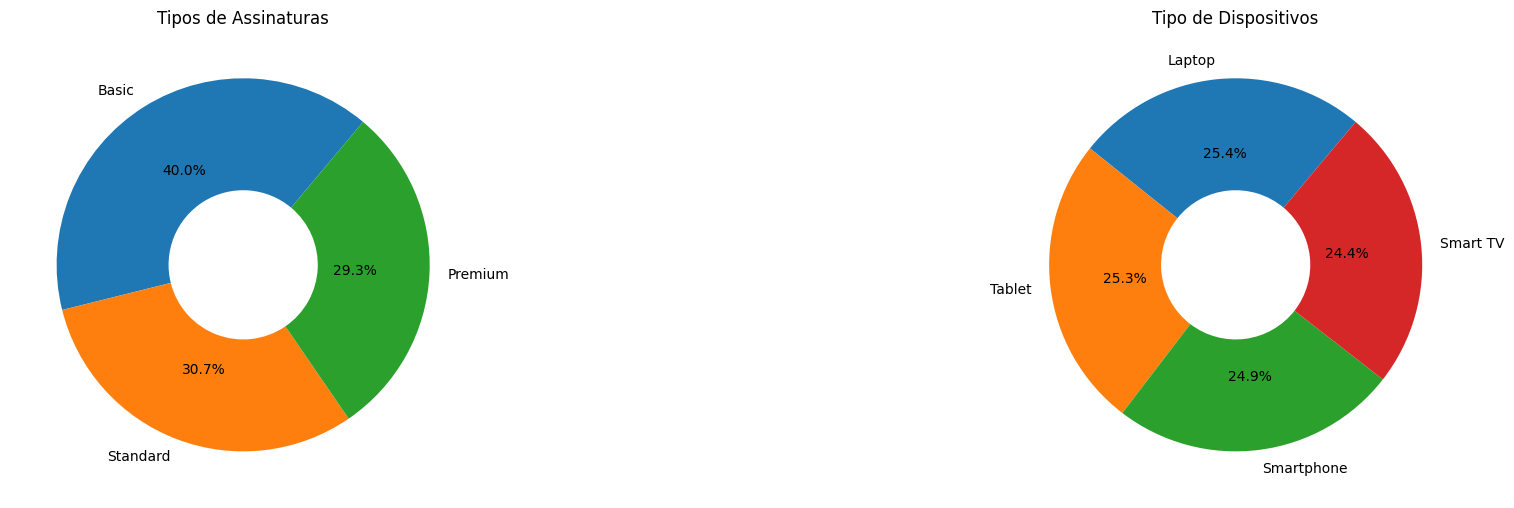

In [ ]:
# Configura o tamanho da representação visual
plt.rc('figure', figsize=(20, 10))

# Cria uma área para a plotagem dos subplots
area = plt.figure()

# Passa como parâmetro número de linhas e colunas para divisão de área e posição de cada subplot na área
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)

assinatura = df_users.tipo_assinatura.value_counts()

# Cria um gráfico de setores para tipo de assinatura
assinatura.plot.pie(autopct='%1.1f%%', startangle=50, wedgeprops=dict(width=0.6), ax=g1)
g1.set_title('Tipos de Assinaturas')
g1.set_ylabel('')

dispositivos = df_users.dispositivo.value_counts()

# Cria um gráfico de setores para tipo de dispositivos
dispositivos.plot.pie(autopct='%1.1f%%', startangle=50, wedgeprops=dict(width=0.6), ax=g2)
g2.set_title('Tipo de Dispositivos')
g2.set_ylabel('')

# Ajusta o layout dos subplots
plt.tight_layout()
plt.show()

In [ ]:
# Conta a frequência que cada valor aparece
df_users.pais.value_counts()

pais
Spain             450
United States     448
Canada            317
France            183
Brazil            183
Mexico            183
United Kingdom    182
Australia         182
Germany           181
Italy             181
Name: count, dtype: int64

In [ ]:
# Calcula o número de total de países
unique_country_name = df_users.pais.nunique()
print(f"Número de países: {unique_country_name}")

Número de países: 10


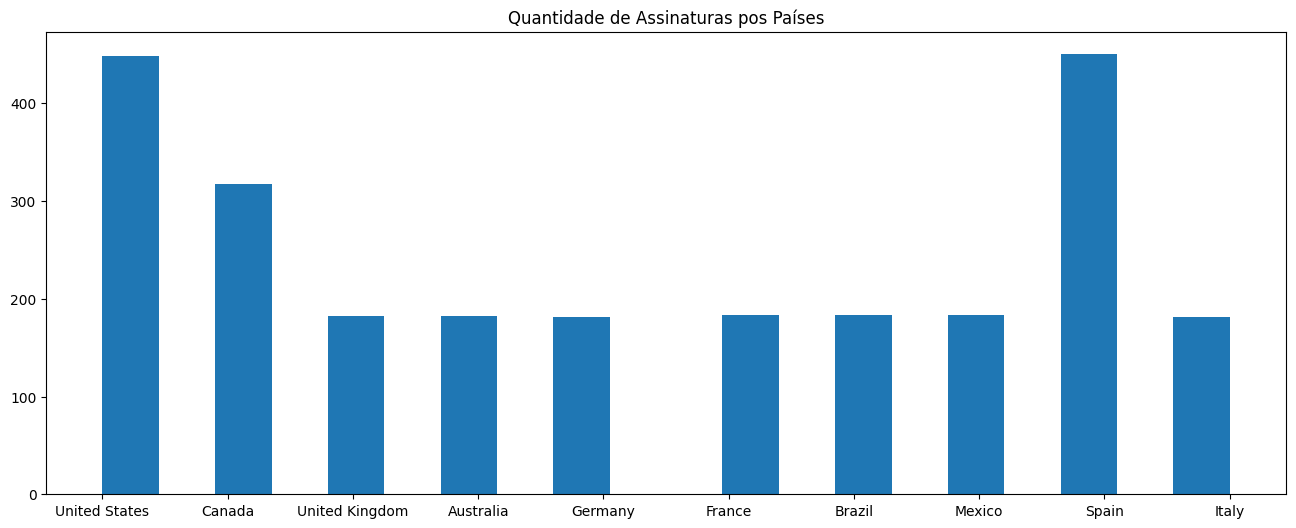

In [ ]:
# Cria gráficos de histograma
plt.figure(figsize=(16,6))
plt.hist(df_users.pais, bins = 20)
plt.title('Quantidade de Assinaturas pos Países');

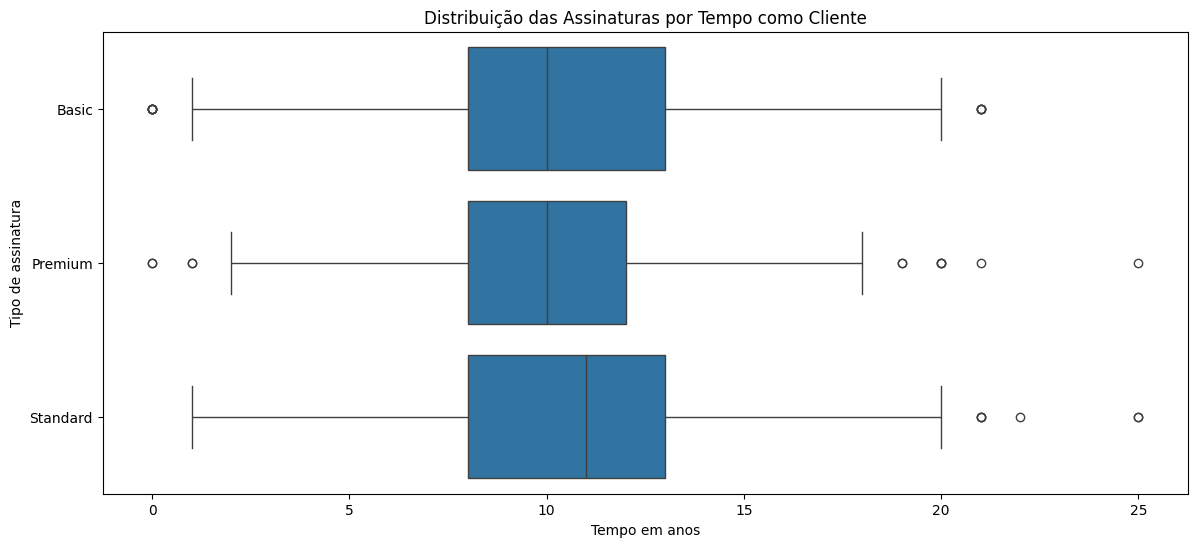

In [ ]:
# Cria um boxplot relacionando as variáveis altura e sexo.
ax = sns.boxplot(data = df_users, x = 'meses_cliente', y = 'tipo_assinatura')
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição das Assinaturas por Tempo como Cliente')
ax.set_ylabel('Tipo de assinatura')
ax.set_xlabel('Tempo em anos')
ax;

In [ ]:
# Mostra uma tabela com estatísticas descritivas das colunas selecionadas
df_users[['idade', 'receita_mensal']].describe().round(2)

,idade,receita_mensal
count,2490.00,2490.00
mean,38.82,12.51
std,7.17,1.69
min,27.00,10.00
25%,32.00,11.00
50%,39.00,12.00
75%,45.00,14.00
max,51.00,15.00


In [ ]:
# Cria variáveis para recebe uma lista com os valores limites e os nomes das classes
classes = [18, 25, 30, 35, 40, 45, 50, 100]
labels = ['Até 25 anos', 'Até 30 anos', 'Até 35 anos', 'Até 40 anos', 'Até 45 anos', 'Até 50 anos', 'A parti 55 anos']

df_users['faixa_etaria'] = pd.cut(x=df_users.idade,
       bins=classes,
       labels=labels,
       include_lowest=True)

# Retorna de forma classificada o número total de vezes que cada classe aparece
faixa_etaria = pd.value_counts(pd.cut(x = df_users.idade,
                                       bins = classes,
                                       labels = labels,
                                       include_lowest = True))

# Calcula a frequência de cada faixa etária sem ordenar
faixa_etaria = pd.value_counts(df_users['faixa_etaria'], sort=False)

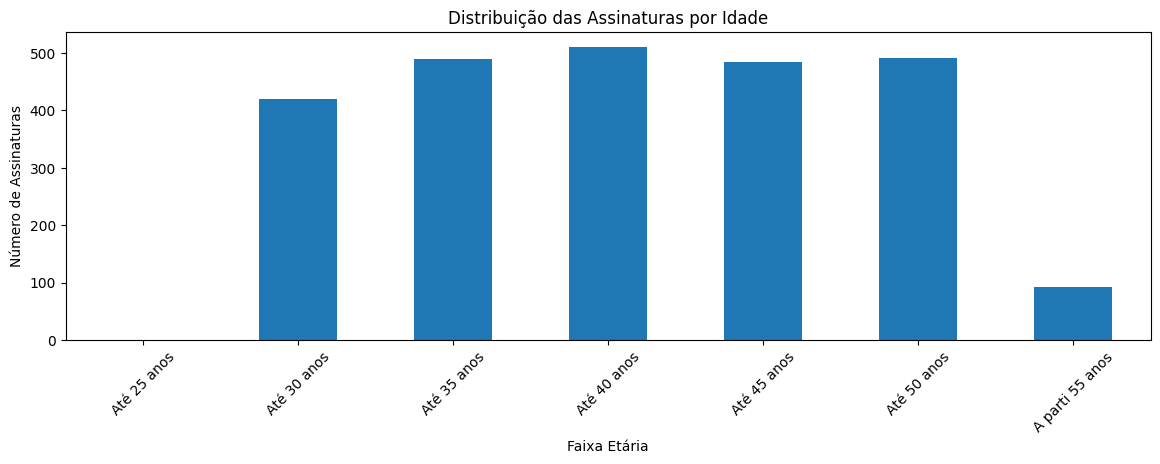

In [ ]:
# Cria gráfico de barras
plt.figure(figsize=(14, 4))
faixa_etaria.plot(kind='bar')
plt.title('Distribuição das Assinaturas por Idade')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Assinaturas')
plt.xticks(rotation=45);

In [ ]:
# Conta a frequência que cada valor aparece
df_users.receita_mensal.value_counts()

receita_mensal
12    453
14    430
13    417
10    406
15    397
11    387
Name: count, dtype: int64

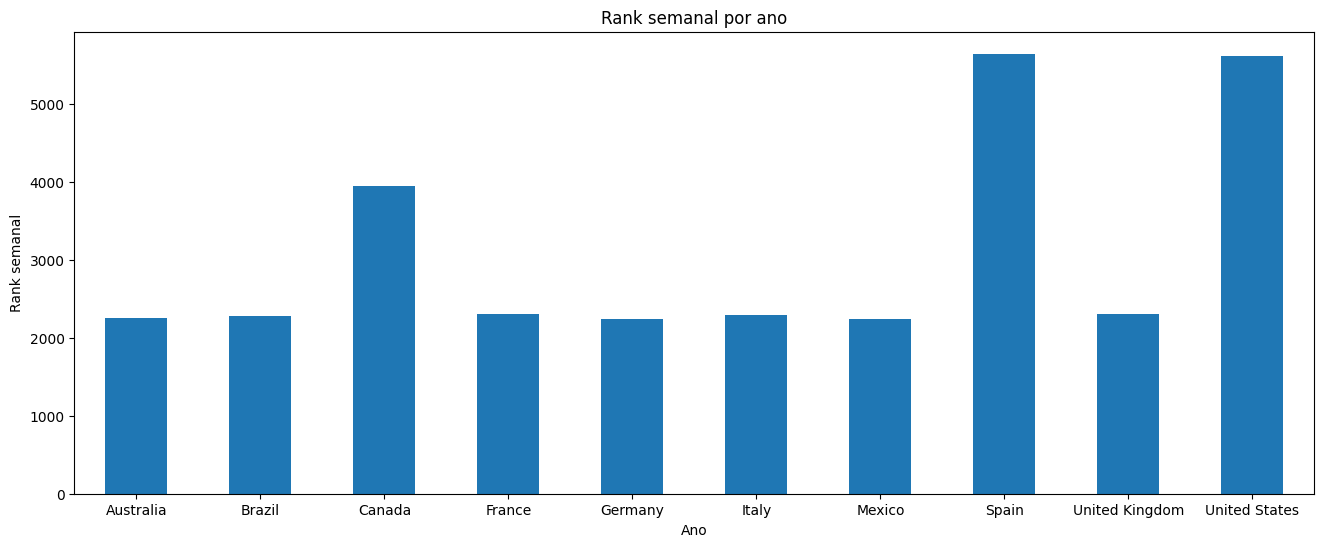

In [ ]:
# Agrupa por pais a soma da receita
receita_pais = df_users.groupby('pais')['receita_mensal'].sum()

# Cria um gráfico de barras
plt.figure(figsize=(16,6))
receita_pais.plot(kind='bar')
plt.title('Receita por País')
plt.xlabel('País')
plt.ylabel('Receita');
plt.xticks(rotation=0);

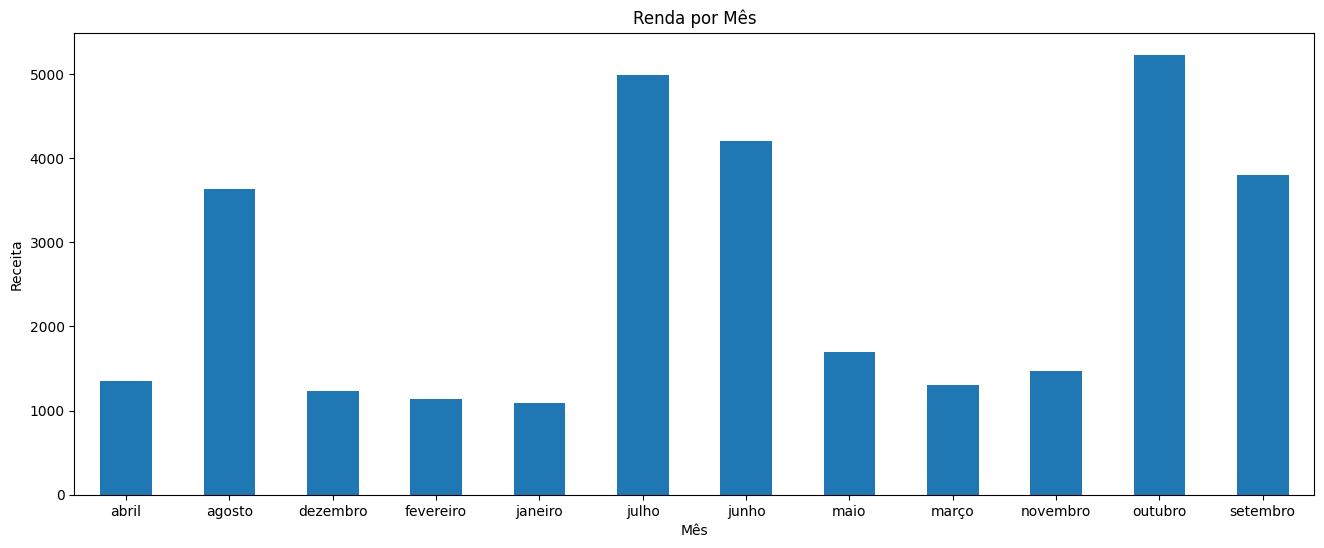

In [ ]:
# Agrupa por mês a soma da receita
receita_mes = df_users.groupby('mes_afiliacao')['receita_mensal'].sum()

# Cria um gráfico de barras
plt.figure(figsize=(16,6))
receita_mes.plot(kind='bar')
plt.title('Renda por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita');
plt.xticks(rotation=0);

## Recorte por gênero

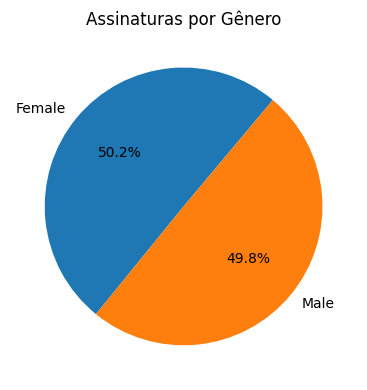

In [ ]:
# Cria um gráfico de setores
plt.figure(figsize=(4, 4))
df_users.genero.value_counts().plot.pie(autopct='%1.1f%%', startangle=50, wedgeprops=dict(width=1))
plt.title('Assinaturas por Gênero')
plt.ylabel('')
plt.tight_layout();

In [ ]:
# Cria uma tabela de frequência cruzada
genero_por_assinatura = pd.crosstab(df_users.genero, df_users.tipo_assinatura)
genero_por_assinatura

tipo_assinatura,Basic,Premium,Standard
genero,,,
Female,511,362,378
Male,485,368,386


In [ ]:
genero_por_dispositivo = pd.crosstab(df_users.genero, df_users.dispositivo)
genero_por_dispositivo

dispositivo,Laptop,Smart TV,Smartphone,Tablet
genero,,,,
Female,327,303,299,322
Male,305,305,320,309


In [ ]:
genero_por_pais = pd.crosstab(df_users.genero, df_users.pais)
genero_por_pais

pais,Australia,Brazil,Canada,France,Germany,Italy,Mexico,Spain,United Kingdom,United States
genero,,,,,,,,,,
Female,89,95,157,91,92,91,89,232,92,223
Male,93,88,160,92,89,90,94,218,90,225


In [ ]:
# Seleciona o valor mínino e máximos das colunas
dt_min_afiliacao = df_users.data_afiliacao.min()
dt_max_afiliacao = df_users.data_afiliacao.max()

print('Os registros de afiliação vão de %s a %s.' %(dt_min_afiliacao, dt_max_afiliacao))

Os registros de afiliação vão de 2021-05-09 00:00:00 a 2023-07-03 00:00:00.


In [ ]:
# Seleciona o valor mínino e máximos das colunas
dt_min_pg = df_users.data_ultimo_pg.min()
dt_max_pg = df_users.data_ultimo_pg.max()

# Mostra os valores .
print('Os registros de último pagamento vão de %s a %s.' %(dt_min_pg, dt_max_pg))

Os registros de último pagamento vão de 2023-01-07 00:00:00 a 2023-12-07 00:00:00.


## Correlação

In [ ]:
# Cria um dataframe só com as variáveis numéricas
df_users_num = df_users.select_dtypes(include=['int64', 'float64', 'datetime'])
df_users_num.head()

,receita_mensal,data_afiliacao,data_ultimo_pg,idade,meses_cliente
0,10,2022-01-15,2023-10-06,28,20
1,15,2021-05-09,2023-06-22,35,25
2,12,2023-02-28,2023-06-27,42,3
3,12,2022-10-07,2023-06-26,51,8
4,10,2023-01-05,2023-06-28,33,5


In [ ]:
# Cria uma matriz com os calculos da correlações entre as variáveis
correlacao_users = df_users_num.corr().round(2)
correlacao_users

,receita_mensal,data_afiliacao,data_ultimo_pg,idade,meses_cliente
receita_mensal,1.00,0.00,-0.01,-0.02,-0.01
data_afiliacao,0.00,1.00,0.08,0.04,-0.72
data_ultimo_pg,-0.01,0.08,1.00,-0.02,0.63
idade,-0.02,0.04,-0.02,1.00,-0.04
meses_cliente,-0.01,-0.72,0.63,-0.04,1.00


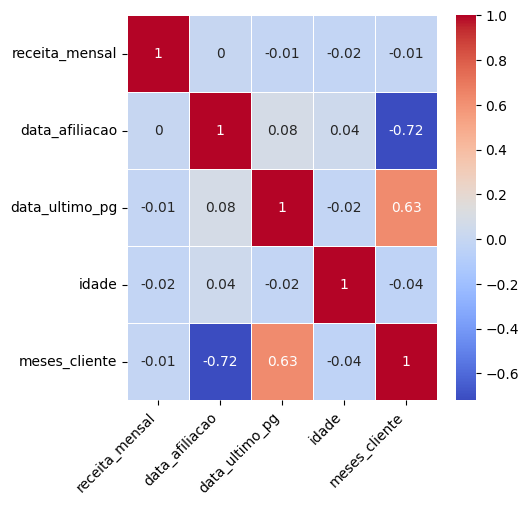

In [ ]:
# Cria um mapa de calor com a matriz de correção criada acima
ax = sns.heatmap(correlacao_users, annot=True, cmap='coolwarm', linewidths=0.5)
ax.figure.set_size_inches(5, 5)
ax.set_xticklabels(ax.get_yticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right');

# Dataset 1 - títulos

In [ ]:
# Mostra um resumo estatístico com as colunas categóricas selecionadas
df_countries[['nome_pais', 'categoria', 'titulo']].describe(include='all')

,nome_pais,categoria,titulo
count,283420,283420,283420
unique,94,2,7439
top,Argentina,Films,Stranger Things
freq,3040,141710,3258


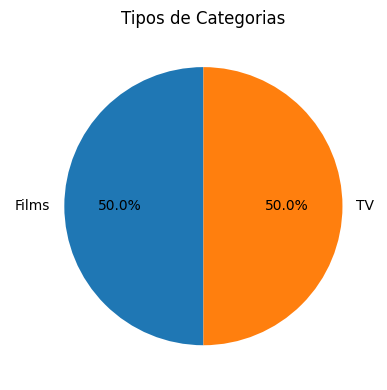

In [ ]:
# Cria um gráfico de setores
plt.figure(figsize=(4, 4))
categorias = df_countries.categoria.value_counts()
categorias.plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=1))
plt.title('Tipos de Categorias')
plt.ylabel('')
plt.tight_layout();

In [ ]:
# Conta a frequência de registros por ano
df_countries.ano.value_counts(sort=False)

ano
2024    39060
2023    98580
2022    96900
2021    48880
Name: count, dtype: int64

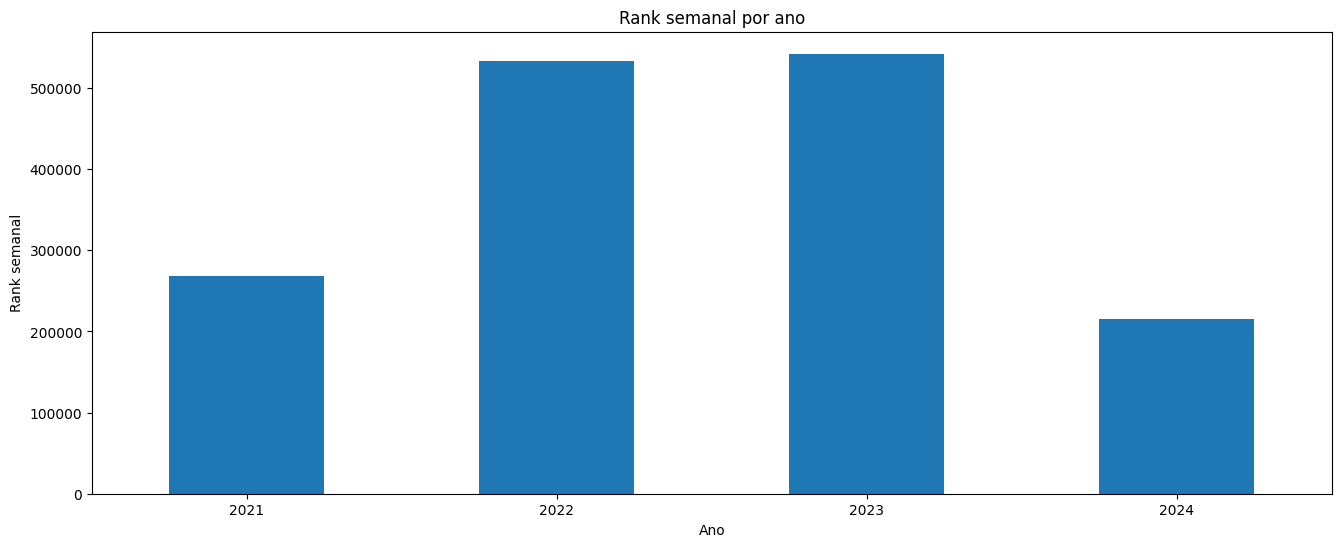

In [ ]:
# Agrupa por ano a soma do rank_semanal
rank_semanal_ano = df_countries.groupby('ano')['rank_semanal'].sum()

# Cria um gráfico de barras sem ordenar os dados
plt.figure(figsize=(16,6))
rank_semanal_ano.plot(kind='bar')
plt.title('Rank semanal por ano')
plt.xlabel('Ano')
plt.ylabel('Rank semanal');
plt.xticks(rotation=0);

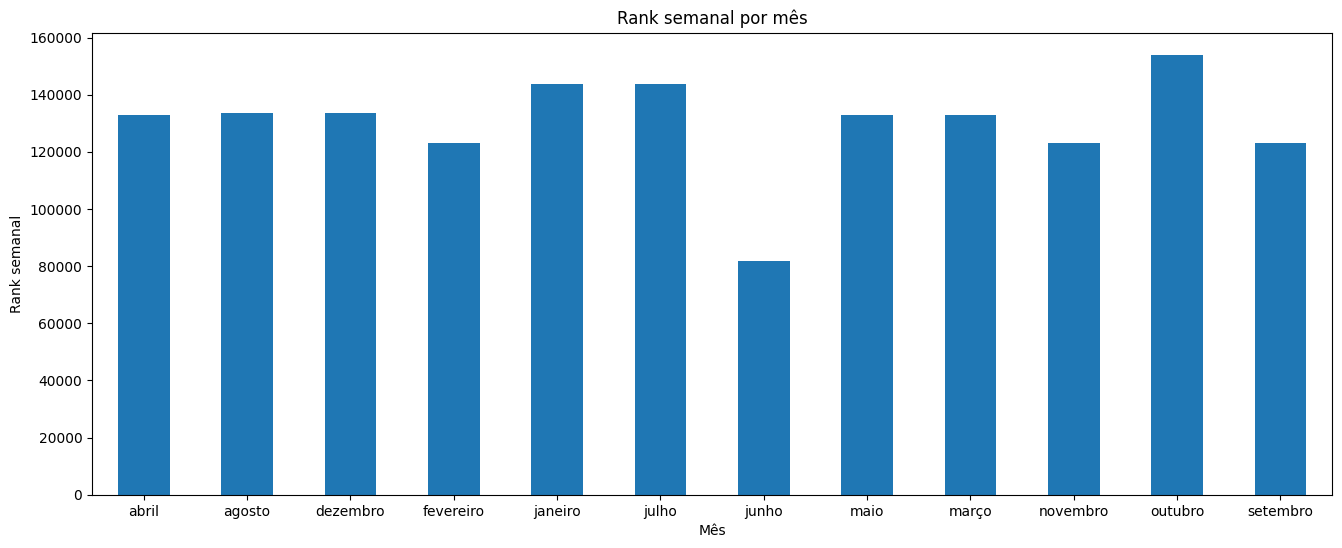

In [ ]:
# Agrupa por mês a soma do rank_semanal
rank_semanal_mes = df_countries.groupby('mes')['rank_semanal'].sum()

# Cria um gráfico de barras sem ordenar os dados
plt.figure(figsize=(16,6))
rank_semanal_mes.plot(kind='bar')
plt.title('Rank semanal por mês')
plt.xlabel('Mês')
plt.ylabel('Rank semanal');
plt.xticks(rotation=0);

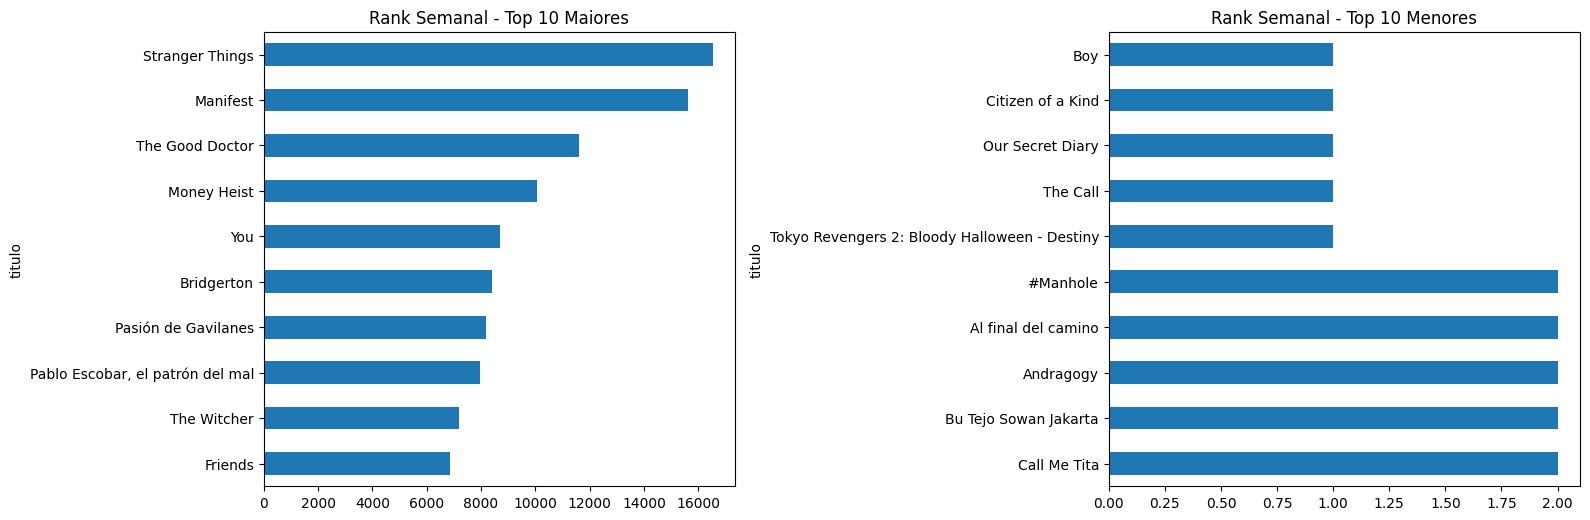

In [ ]:
# Configura o tamanho da representação visual
plt.rc('figure', figsize=(16, 10))

# Cria uma área para a plotagem dos gráficos
area = plt.figure()

# Passa como parâmetro número de linhas e colunas para divisão de área e posição de cada gráfico na área
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)


# Agrupa por títulos e soma o rank_semanal, depois ordena e seleciona os 10 maiores
rank_semanal_titulo_10_mais = df_countries.groupby('titulo')['rank_semanal'].sum().nlargest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_semanal_titulo_10_mais = rank_semanal_titulo_10_mais[::-1]

# Cria um gráfico de barras horizontais no primeiro subplot (g1)
rank_semanal_titulo_10_mais.plot(kind='barh', ax=g1)
g1.set_title('Rank Semanal - Top 10 Maiores')


# Agrupa os dados por títulos, soma o rank_semanal e classifica de forma ascendente
rank_semanal_titulo_10_menos = df_countries.groupby('titulo')['rank_semanal'].sum().nsmallest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_semanal_titulo_10_menos = rank_semanal_titulo_10_menos[::-1]

# Cria um gráfico de barras horizontais no segundo subplot (g2)
rank_semanal_titulo_10_menos.plot(kind='barh', ax=g2)
g2.set_title('Rank Semanal - Top 10 Menores')


# Ajusta o layout dos subplots
plt.tight_layout()
plt.show()

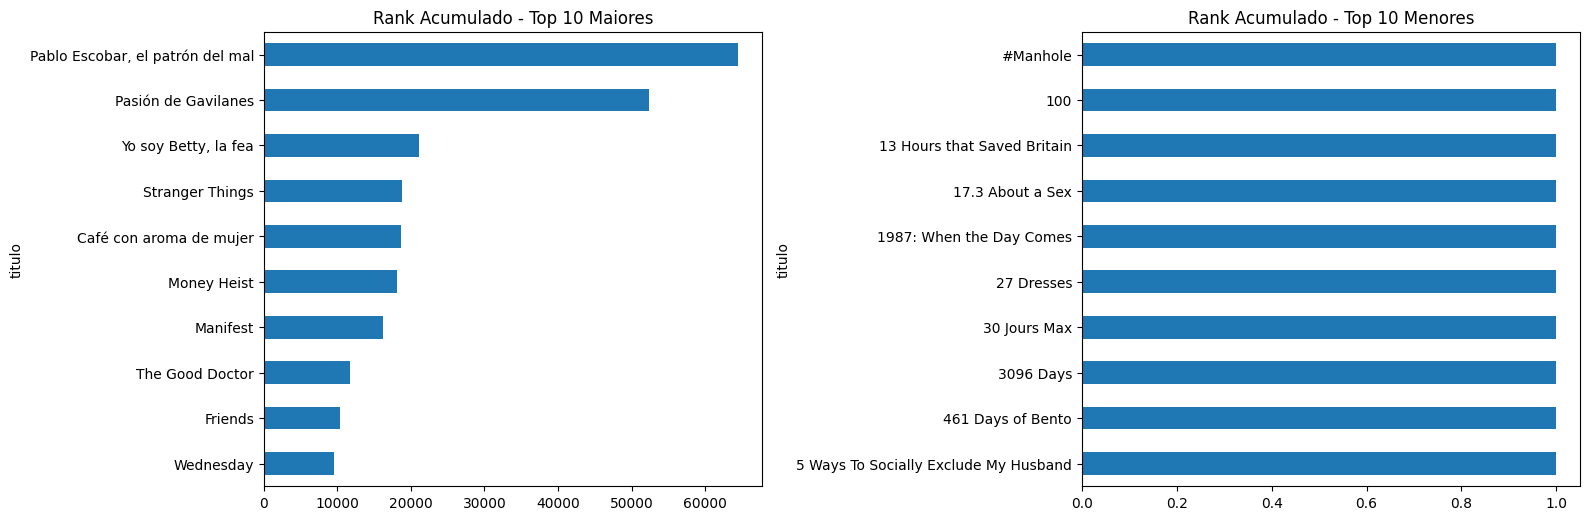

In [ ]:
# Configura o tamanho da representação visual
plt.rc('figure', figsize=(16, 10))

# Cria uma área para a plotagem dos gráficos
area = plt.figure()

# Passa como parâmetro número de linhas e colunas para divisão de área e posição de cada gráfico na área
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)


# Agrupa por títulos e soma o rank_semanal, depois ordena e seleciona os 10 maiores
rank_acumulado_titulo_10_mais = df_countries.groupby('titulo')['semanas_acumuladas_top_10'].sum().nlargest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_acumulado_titulo_10_mais = rank_acumulado_titulo_10_mais[::-1]

# Cria um gráfico de barras horizontais no terceiro subplot (g1)
rank_acumulado_titulo_10_mais.plot(kind='barh', ax=g1)
g1.set_title('Rank Acumulado - Top 10 Maiores')


# Agrupa por títulos e soma o rank_semanal, depois ordena e seleciona os 10 maiores
rank_acumulado_titulo_10_menos = df_countries.groupby('titulo')['semanas_acumuladas_top_10'].sum().nsmallest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_acumulado_titulo_10_menos = rank_acumulado_titulo_10_menos[::-1]

# Cria um gráfico de barras horizontais no quarto subplot (g2)
rank_acumulado_titulo_10_menos.plot(kind='barh', ax=g2)
g2.set_title('Rank Acumulado - Top 10 Menores')


# Ajusta o layout dos subplots
plt.tight_layout()
plt.show()

In [ ]:
# Seleciona o valor mínino e máximos das colunas
dt_min_semana = df_countries.semana.min()
dt_max_semana = df_countries.semana.max()

print('Os registros semanais vão de %s a %s.' %(dt_min_semana, dt_max_semana))

Os registros semanais vão de 2021-07-04 00:00:00 a 2024-05-26 00:00:00.


## Correlação

In [ ]:
# Cria um dataframe só com as variáveis numéricas
df_countries_num = df_countries.select_dtypes(include=['int64', 'float64', 'datetime'])
df_countries_num.head()

,semana,rank_semanal,semanas_acumuladas_top_10
0,2024-05-26,1,1
1,2024-05-26,2,1
2,2024-05-26,3,1
3,2024-05-26,4,1
4,2024-05-26,5,2


In [ ]:
# Cria uma matriz com os calculos da correlações entre as variáveis
correlacao_countries = df_countries_num.corr().round(2)
correlacao_countries

,semana,rank_semanal,semanas_acumuladas_top_10
semana,1.00,0.00,-0.02
rank_semanal,0.00,1.00,0.07
semanas_acumuladas_top_10,-0.02,0.07,1.00


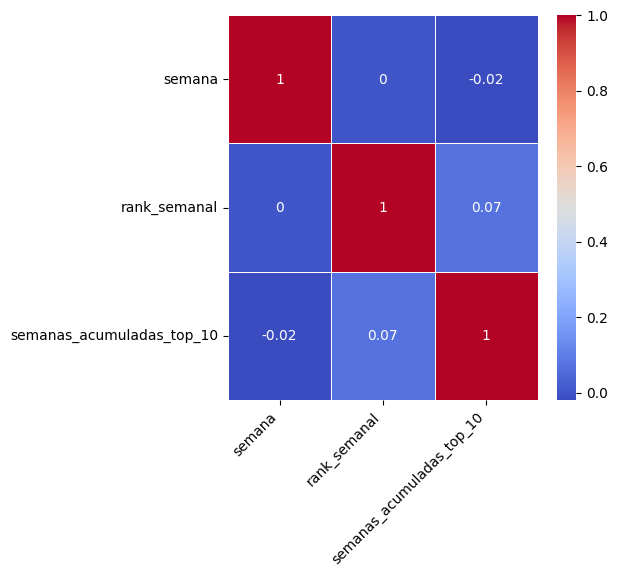

In [ ]:
# Cria um mapa de calor com a matriz de correção criada acima
ax = sns.heatmap(correlacao_countries, annot=True, cmap='coolwarm', linewidths=0.5)
ax.figure.set_size_inches(5, 5)
ax.set_xticklabels(ax.get_yticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right');

# Dataset 2 - títulos

In [ ]:
# Mostra um resumo estatístico com as colunas categóricas selecionadas
df_global[['categoria', 'titulo', 'lançamento_escalonado']].describe(include='all')

,categoria,titulo,lançamento_escalonado
count,6080,6080,6080
unique,4,1993,2
top,Films (English),Manifest,False
freq,1520,51,6002


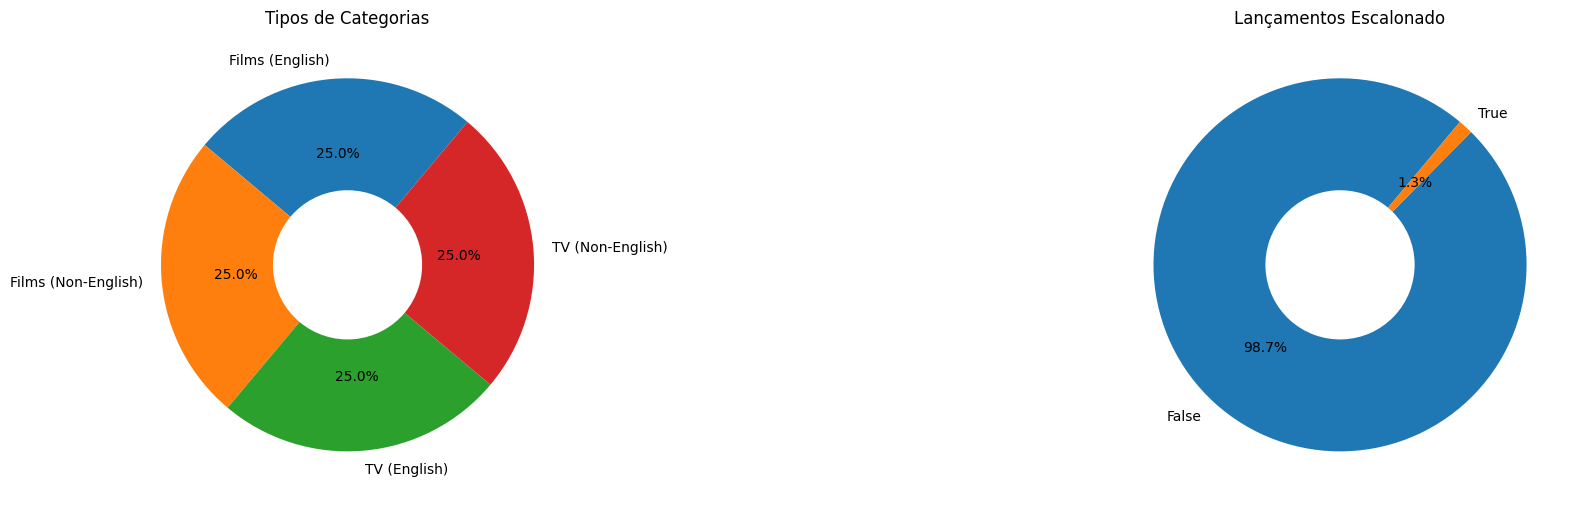

In [ ]:
# Configura o tamanho da representação visual
plt.rc('figure', figsize = (20,10))

# Cria uma área para a plotagem dos gráficos
area = plt.figure()

# Passa como parâmetro número de linhas e colunas para divisão de área e posição de cada gráfico na área
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)

# Cria um gráfico de setores
categorias = df_global.categoria.value_counts()
categorias.plot.pie(autopct='%1.1f%%', startangle=50, wedgeprops=dict(width=0.6), ax=g1)
g1.set_title('Tipos de Categorias')
g1.set_ylabel('')

# Cria um gráfico de setores
escalonado = df_global.lançamento_escalonado.value_counts()
escalonado.plot.pie(autopct='%1.1f%%', startangle=50, wedgeprops=dict(width=0.6), ax=g2)
g2.set_title('Lançamentos Escalonado')
g2.set_ylabel('')

# Ajusta o layout dos subplots
plt.tight_layout()
plt.show()

In [ ]:
# Conta a frequência de registros por ano
df_global.ano.value_counts(sort=False)

ano
2021    1040
2022    2080
2023    2120
2024     840
Name: count, dtype: int64

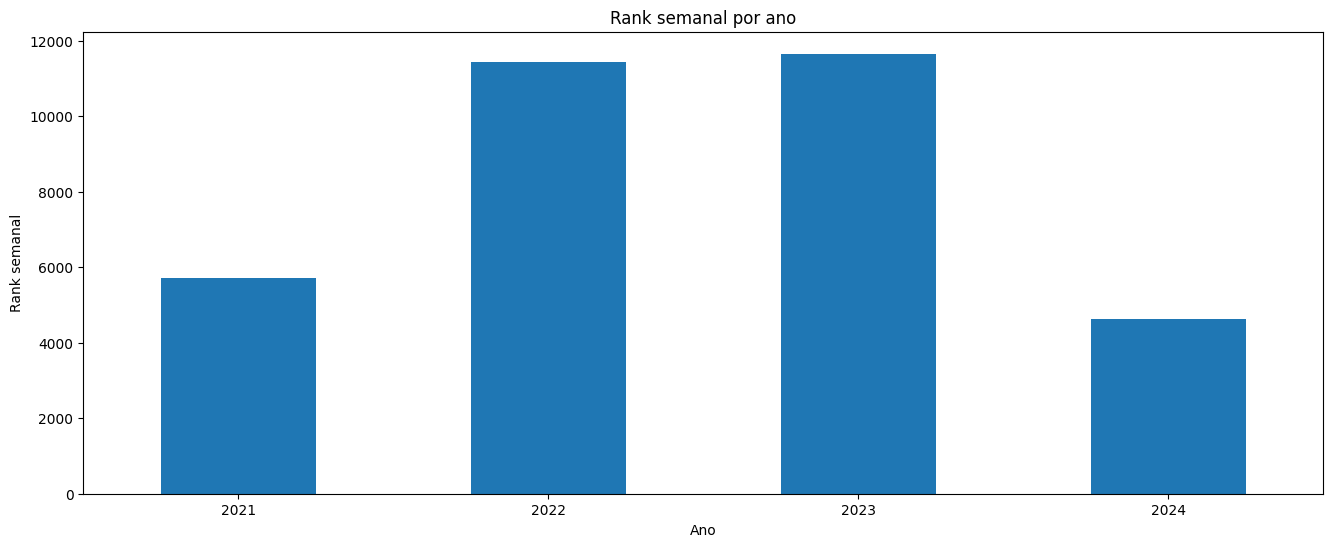

In [ ]:
# Agrupa por ano a soma do rank_semanal
rank_semanal_ano = df_global.groupby('ano')['rank_semanal'].sum()

# Cria um gráfico de barras sem ordenar os dados
plt.figure(figsize=(16, 6))
rank_semanal_ano.plot(kind='bar')
plt.title('Rank semanal por ano')
plt.xlabel('Ano')
plt.ylabel('Rank semanal');
plt.xticks(rotation=0);

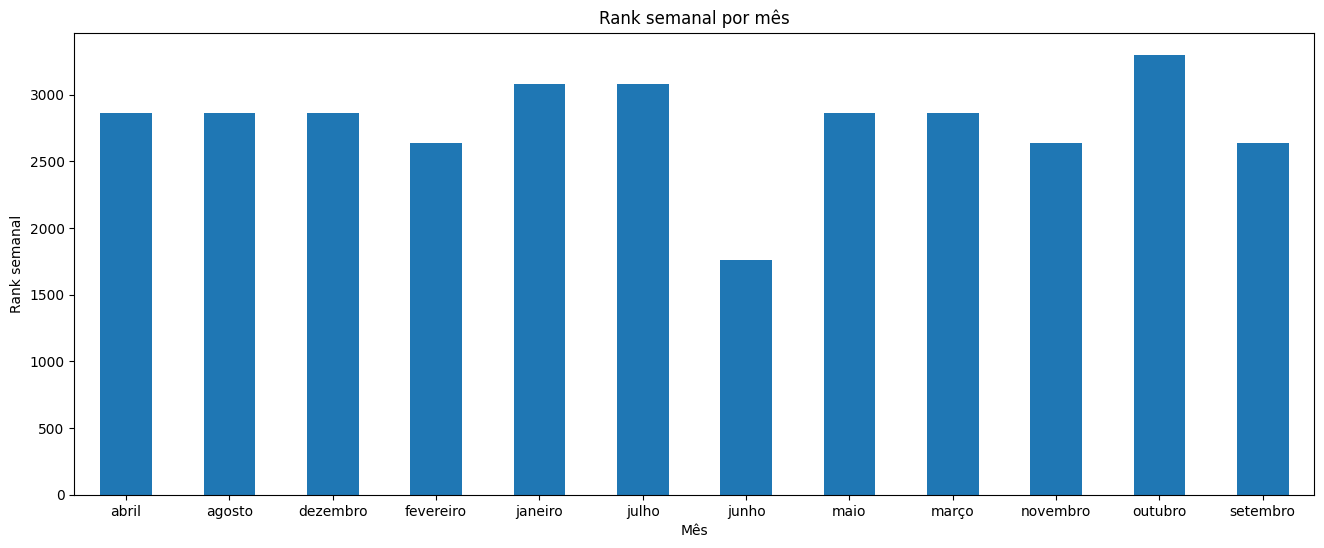

In [ ]:
# Agrupa por mês a soma do rank_semanal
rank_semanal_mes = df_global.groupby('mes')['rank_semanal'].sum()

# Cria um gráfico de barras sem ordenar os dados
plt.figure(figsize=(16, 6))
rank_semanal_mes.plot(kind='bar')
plt.title('Rank semanal por mês')
plt.xlabel('Mês')
plt.ylabel('Rank semanal')
plt.xticks(rotation=0);

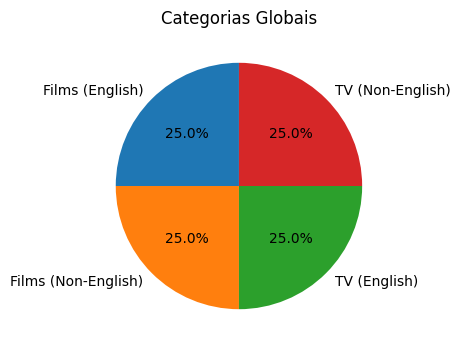

In [ ]:
# Cria um gráfico de setores
plt.figure(figsize=(4, 4))
categorias = df_global.categoria.value_counts()
categorias.plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=1))
plt.title('Categorias Globais')
plt.ylabel('');

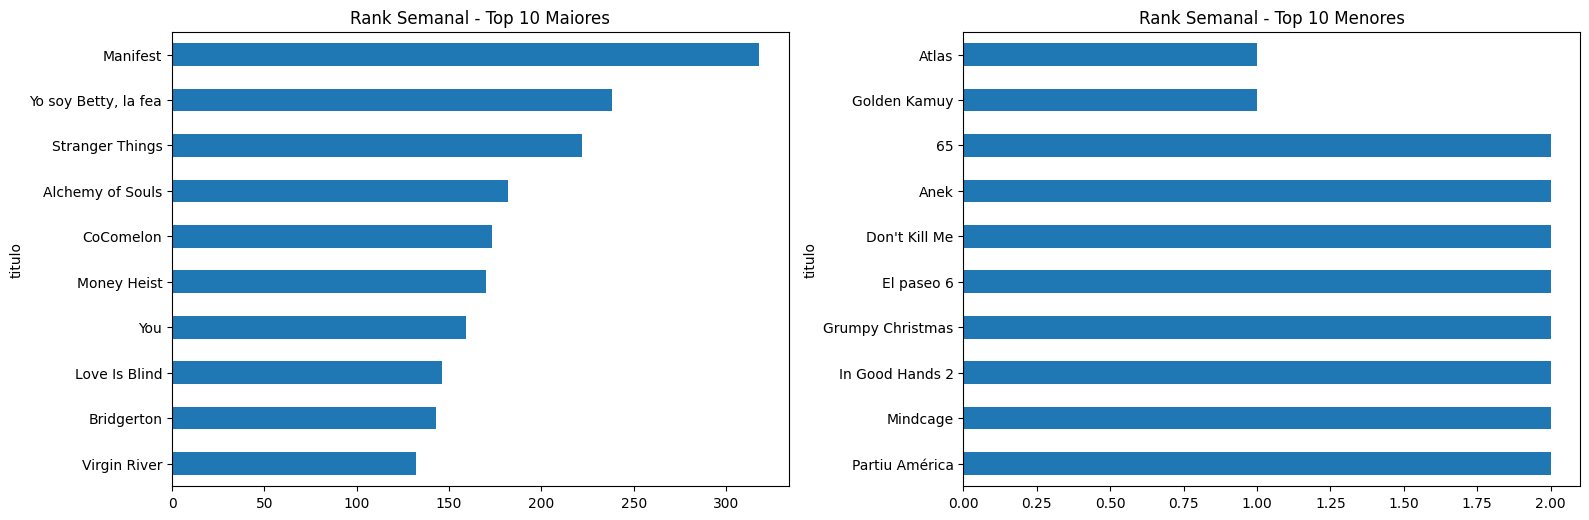

In [ ]:
# Configura o tamanho da representação visual
plt.rc('figure', figsize=(16, 10))

# Cria uma área para a plotagem dos gráficos
area = plt.figure()

# Passa como parâmetro número de linhas e colunas para divisão de área e posição de cada gráfico na área
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)


# Agrupa por títulos e soma o rank_semanal, depois ordena e seleciona os 10 maiores
rank_semanal_titulo_10_mais = df_global.groupby('titulo')['rank_semanal'].sum().nlargest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_semanal_titulo_10_mais = rank_semanal_titulo_10_mais[::-1]

# Cria um gráfico de barras horizontais no primeiro subplot (g1)
rank_semanal_titulo_10_mais.plot(kind='barh', ax=g1)
g1.set_title('Rank Semanal - Top 10 Maiores')


# Agrupa os dados por títulos, soma o rank_semanal e classifica de forma ascendente
rank_semanal_titulo_10_menos = df_global.groupby('titulo')['rank_semanal'].sum().nsmallest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_semanal_titulo_10_menos = rank_semanal_titulo_10_menos[::-1]

# Cria um gráfico de barras horizontais no segundo subplot (g2)
rank_semanal_titulo_10_menos.plot(kind='barh', ax=g2)
g2.set_title('Rank Semanal - Top 10 Menores')


# Ajusta o layout dos subplots
plt.tight_layout()
plt.show()

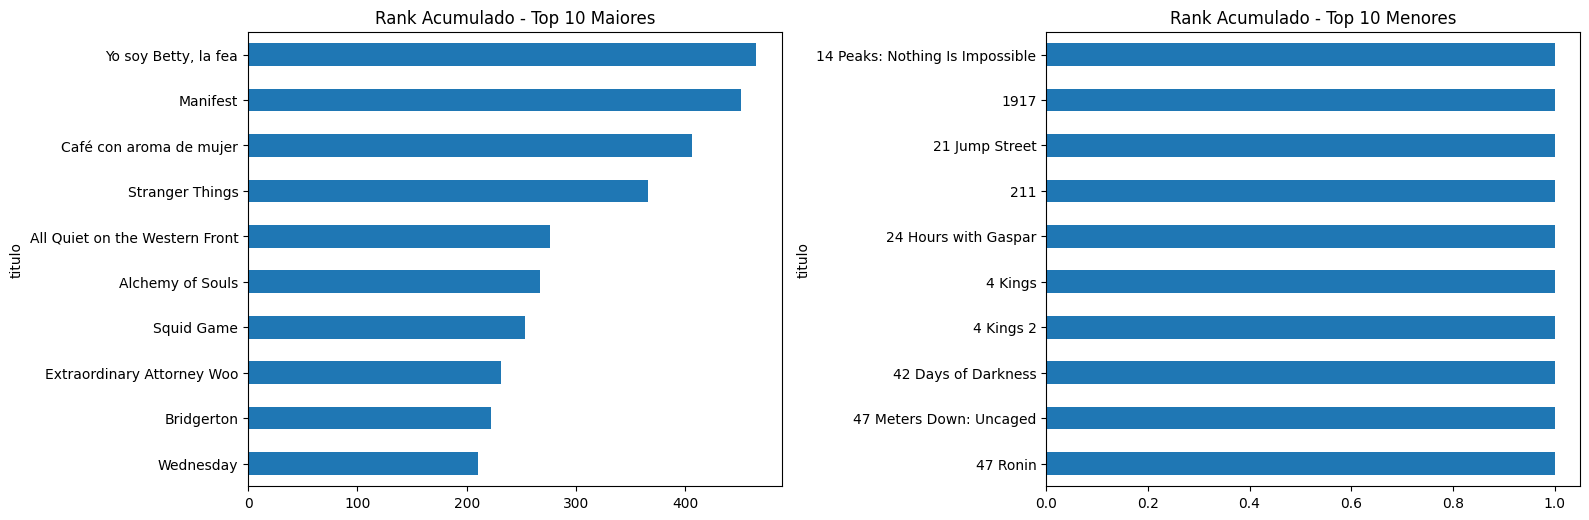

In [ ]:
# Configura o tamanho da representação visual
plt.rc('figure', figsize=(16, 10))

# Cria uma área para a plotagem dos gráficos
area = plt.figure()

# Passa como parâmetro número de linhas e colunas para divisão de área e posição de cada gráfico na área
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)


# Agrupa por títulos e soma o rank_semanal, depois ordena e seleciona os 10 maiores
rank_acumulado_titulo_10_mais = df_global.groupby('titulo')['semanas_acumuladas_top_10'].sum().nlargest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_acumulado_titulo_10_mais = rank_acumulado_titulo_10_mais[::-1]

# Cria um gráfico de barras horizontais no terceiro subplot (g1)
rank_acumulado_titulo_10_mais.plot(kind='barh', ax=g1)
g1.set_title('Rank Acumulado - Top 10 Maiores')


# Agrupa por títulos e soma o rank_semanal, depois ordena e seleciona os 10 maiores
rank_acumulado_titulo_10_menos = df_global.groupby('titulo')['semanas_acumuladas_top_10'].sum().nsmallest(10)

# Inverte a ordem para que os maiores apareçam no topo
rank_acumulado_titulo_10_menos = rank_acumulado_titulo_10_menos[::-1]

# Cria um gráfico de barras horizontais no quarto subplot (g2)
rank_acumulado_titulo_10_menos.plot(kind='barh', ax=g2)
g2.set_title('Rank Acumulado - Top 10 Menores')


# Ajusta o layout dos subplots
plt.tight_layout()
plt.show()

In [ ]:
# Seleciona o valor mínino e máximos das colunas
dt_min_semana = df_global.semana.min()
dt_max_semana = df_global.semana.max()

print('Os registros semanais vão de %s a %s.' %(dt_min_semana, dt_max_semana))

Os registros semanais vão de 2021-07-04 00:00:00 a 2024-05-26 00:00:00.


## Correlação

In [ ]:
# Cria um dataframe só com as variáveis numéricas
df_global_num = df_global.select_dtypes(include=['int64', 'float64', 'datetime'])
df_global_num.head()

,semana,rank_semanal,horas_semanais_visualizadas,semanas_acumuladas_top_10
0,2021-07-04,1,25680000,1
1,2021-07-04,2,16620000,1
2,2021-07-04,3,15260000,1
3,2021-07-04,4,13690000,1
4,2021-07-04,5,10580000,1


In [ ]:
# Cria uma matriz com os calculos da correlações entre as variáveis
correlacao_global = df_global_num.corr().round(2)
correlacao_global

,semana,rank_semanal,horas_semanais_visualizadas,semanas_acumuladas_top_10
semana,1.00,0.00,-0.06,-0.02
rank_semanal,0.00,1.00,-0.47,0.15
horas_semanais_visualizadas,-0.06,-0.47,1.00,-0.03
semanas_acumuladas_top_10,-0.02,0.15,-0.03,1.00


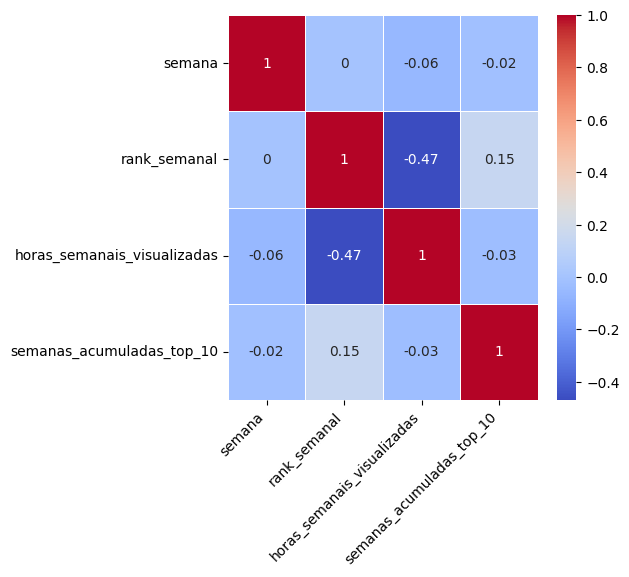

In [ ]:
# Cria um mapa de calor com a matriz de correção criada acima
ax = sns.heatmap(correlacao_global, annot=True, cmap='coolwarm', linewidths=0.5)
ax.figure.set_size_inches(5, 5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right');